In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from pathlib import Path

from IPython.display import display, Math

from plotting import plot

In [2]:
data_path = Path('db.npz')
with np.load(data_path, allow_pickle = True) as f:
    param_labels = f['param_labels'] # last one is cosmo sigma_8
    redshifts = f['redshifts']
    xHIs = f['xHI']
    Tbs = f['Tb']
    params = f['params']
    UVLFs = f['UVLFs']
    Ts = f['Ts']
    LF_zs = f['LF_zs']
    M_UV = f['M_UV']
    taus = f['tau_e']
print('Database size:', UVLFs.shape[0], 'samples')

Database size: 10000 samples


In [3]:
print('Number of emulator input parameters:',params.shape[-1])
print('Parameter names:')
for i in param_labels:
    display(Math(r' ' + i[1:-1]))

Number of emulator input parameters: 11
Parameter names:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
print('Number of redshifts for global quantities:',redshifts.shape[0])
print('Number of M_UV bins:',M_UV.shape[0], 'ranging from', np.round(M_UV[0],1), 'to', np.round(M_UV[-1],1))
print('Number of redshifts for LF:',LF_zs.shape[0])

Number of redshifts for global quantities: 93
Number of M_UV bins: 45 ranging from -21.6 to -6.7
Number of redshifts for LF: 7


Plot the volume-averaged (global) quantities we have as a function of redshift:

Global hydrogen neutral fraction $\overline{x}_{\rm HI}$:

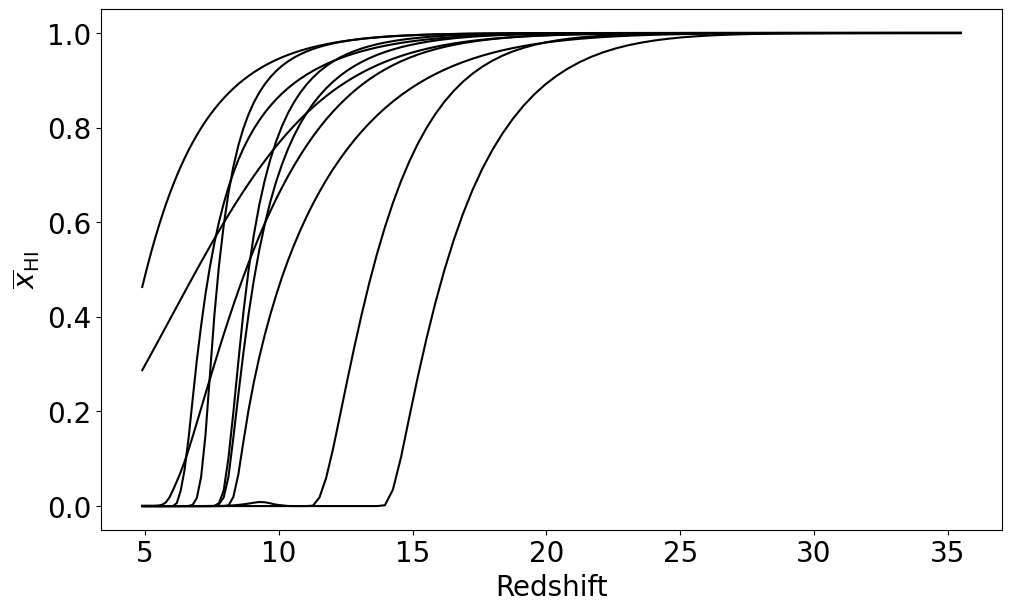

In [5]:
plot(redshifts=redshifts,xhi=xHIs)

The mean spin temperature of the neutral IGM $T_S$ as a function of redshift.  The IGM spin temperature is only defined for neutral hydrogen that is outside of the cosmic HII regions that surround galaxies.

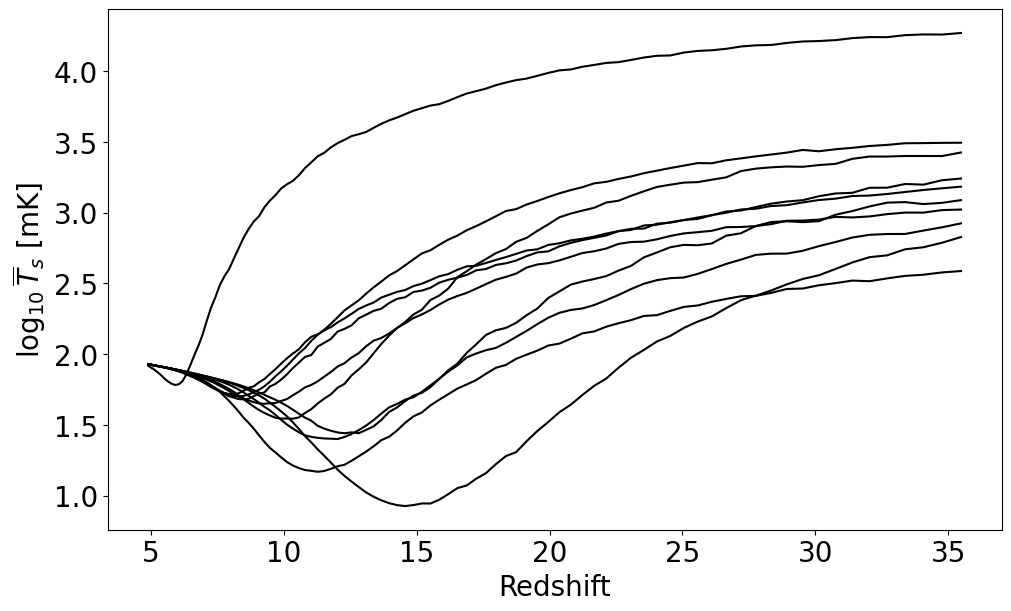

In [6]:
plot(redshifts=redshifts,ts=Ts)

The global signal...
\begin{align}
\delta T_{\rm b}(\boldsymbol{x}, z) &=  \frac{T_{\rm S} - T_{\rm R}}{1+z}(1-e^{\tau_{21}})\\ 
%
\nonumber &\approx  27 \ x_{\rm HI} (1 + \delta_b) \left( \frac{\Omega_b h^2}{0.023}\right) \left( \frac{0.15}{\Omega_m h^2} \frac{1+z}{10}\right)^{1/2} \ \rm{mK} \\
%
\nonumber &\times \left( \frac{T_{\rm S} - T_{\rm R}}{T_{\rm S}}\right) \left[ \frac{\partial_r v_r} {(1+z)H(z)}\right],
\end{align}
where $\tau_{21}$ is the 21cm optical depth of the intervening gas, $\delta_b \equiv \rho/\bar{\rho} - 1$ is the baryon overdensity, with $\rho$ being the baryon density, and $T_{\rm S}$ and $T_{\rm R}$ are the spin and background temperatures, respectively.  We assume throughout that the radio background is provided by the CMB, $T_{\rm R} = T_{\rm CMB}$ is the temperature of the CMB.  We note that \cmfast\ computes the brightness temperature at each cell location, ${\bf x}$, using the exact expression in the first line of the equation above; the second line is a Taylor expansion in the limit of $\tau_{21} \ll 1$ that provides physical intuition.

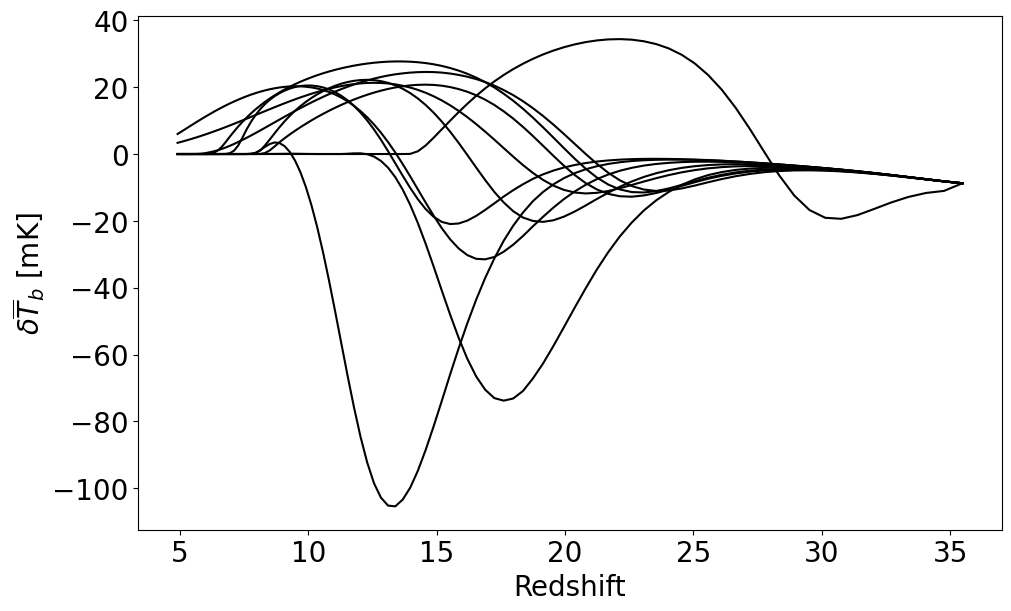

In [7]:
plot(redshifts=redshifts,tb=Tbs)

$\boldsymbol{\tau_e }$ is the Thompson optical depth to the last scattering surface (LSS):
$\tau_e = \sigma_T \int_0^{z_{\rm{LSS}}} dz \ | \frac{c dt}{dz} | \ n_e $,
where $\sigma_T$ is the Thompson scattering cross section and $n_e$ is the electron number density calculated assuming hydrogen and helium are singly ionized at a fraction $(1-\overline{x}_{\rm HI})$ and that helium is doubly ionized at $z < 3$.

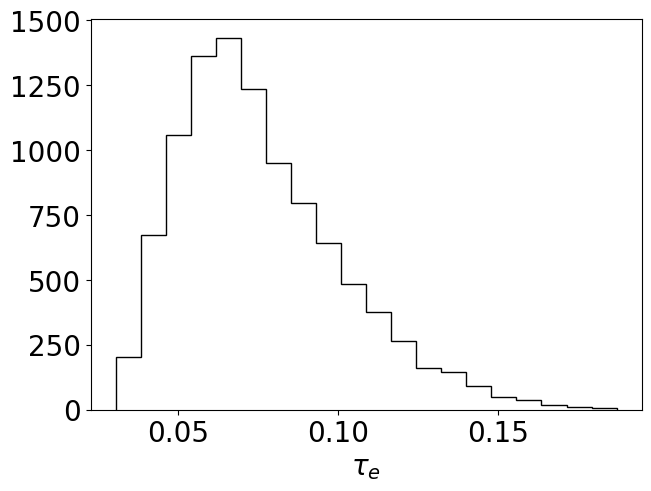

In [8]:
plot(redshifts=redshifts,tau=taus)

The non-ionizing UV luminosity function (UV LF), $\phi$, defined as the number density of galaxies per UV magnitude, $M_{1500}$, as a function of redshift.  The $\sim 1500 $ rest frame luminosity is calculated from the SFR:
$\dot{M}_\ast (M_h,z) = \mathcal{K}_{\rm UV} \times L_{\rm UV},$ where  $\mathcal{K}_{\rm UV} = 1.15 \cdot 10^{-28} \rm{M}_\odot \rm{ yr}^{-1} \ \rm{Hz} \ \rm{s}\ {erg}^{-1}$ assumes a Salpeter initial mass function (e.g., Madau \& Dickinson 2014, Sun \& Furlanetto 2016).
The UV luminosity is related to the AB magnitude using (Oke \& Gunn 1983): $\log\left( \frac{L_{\rm UV}}{\rm{erg} \ {s}^{-1} \ {Hz}^{-1}}\right) = 0.4 \times (51.63 - M_{\rm UV}).$

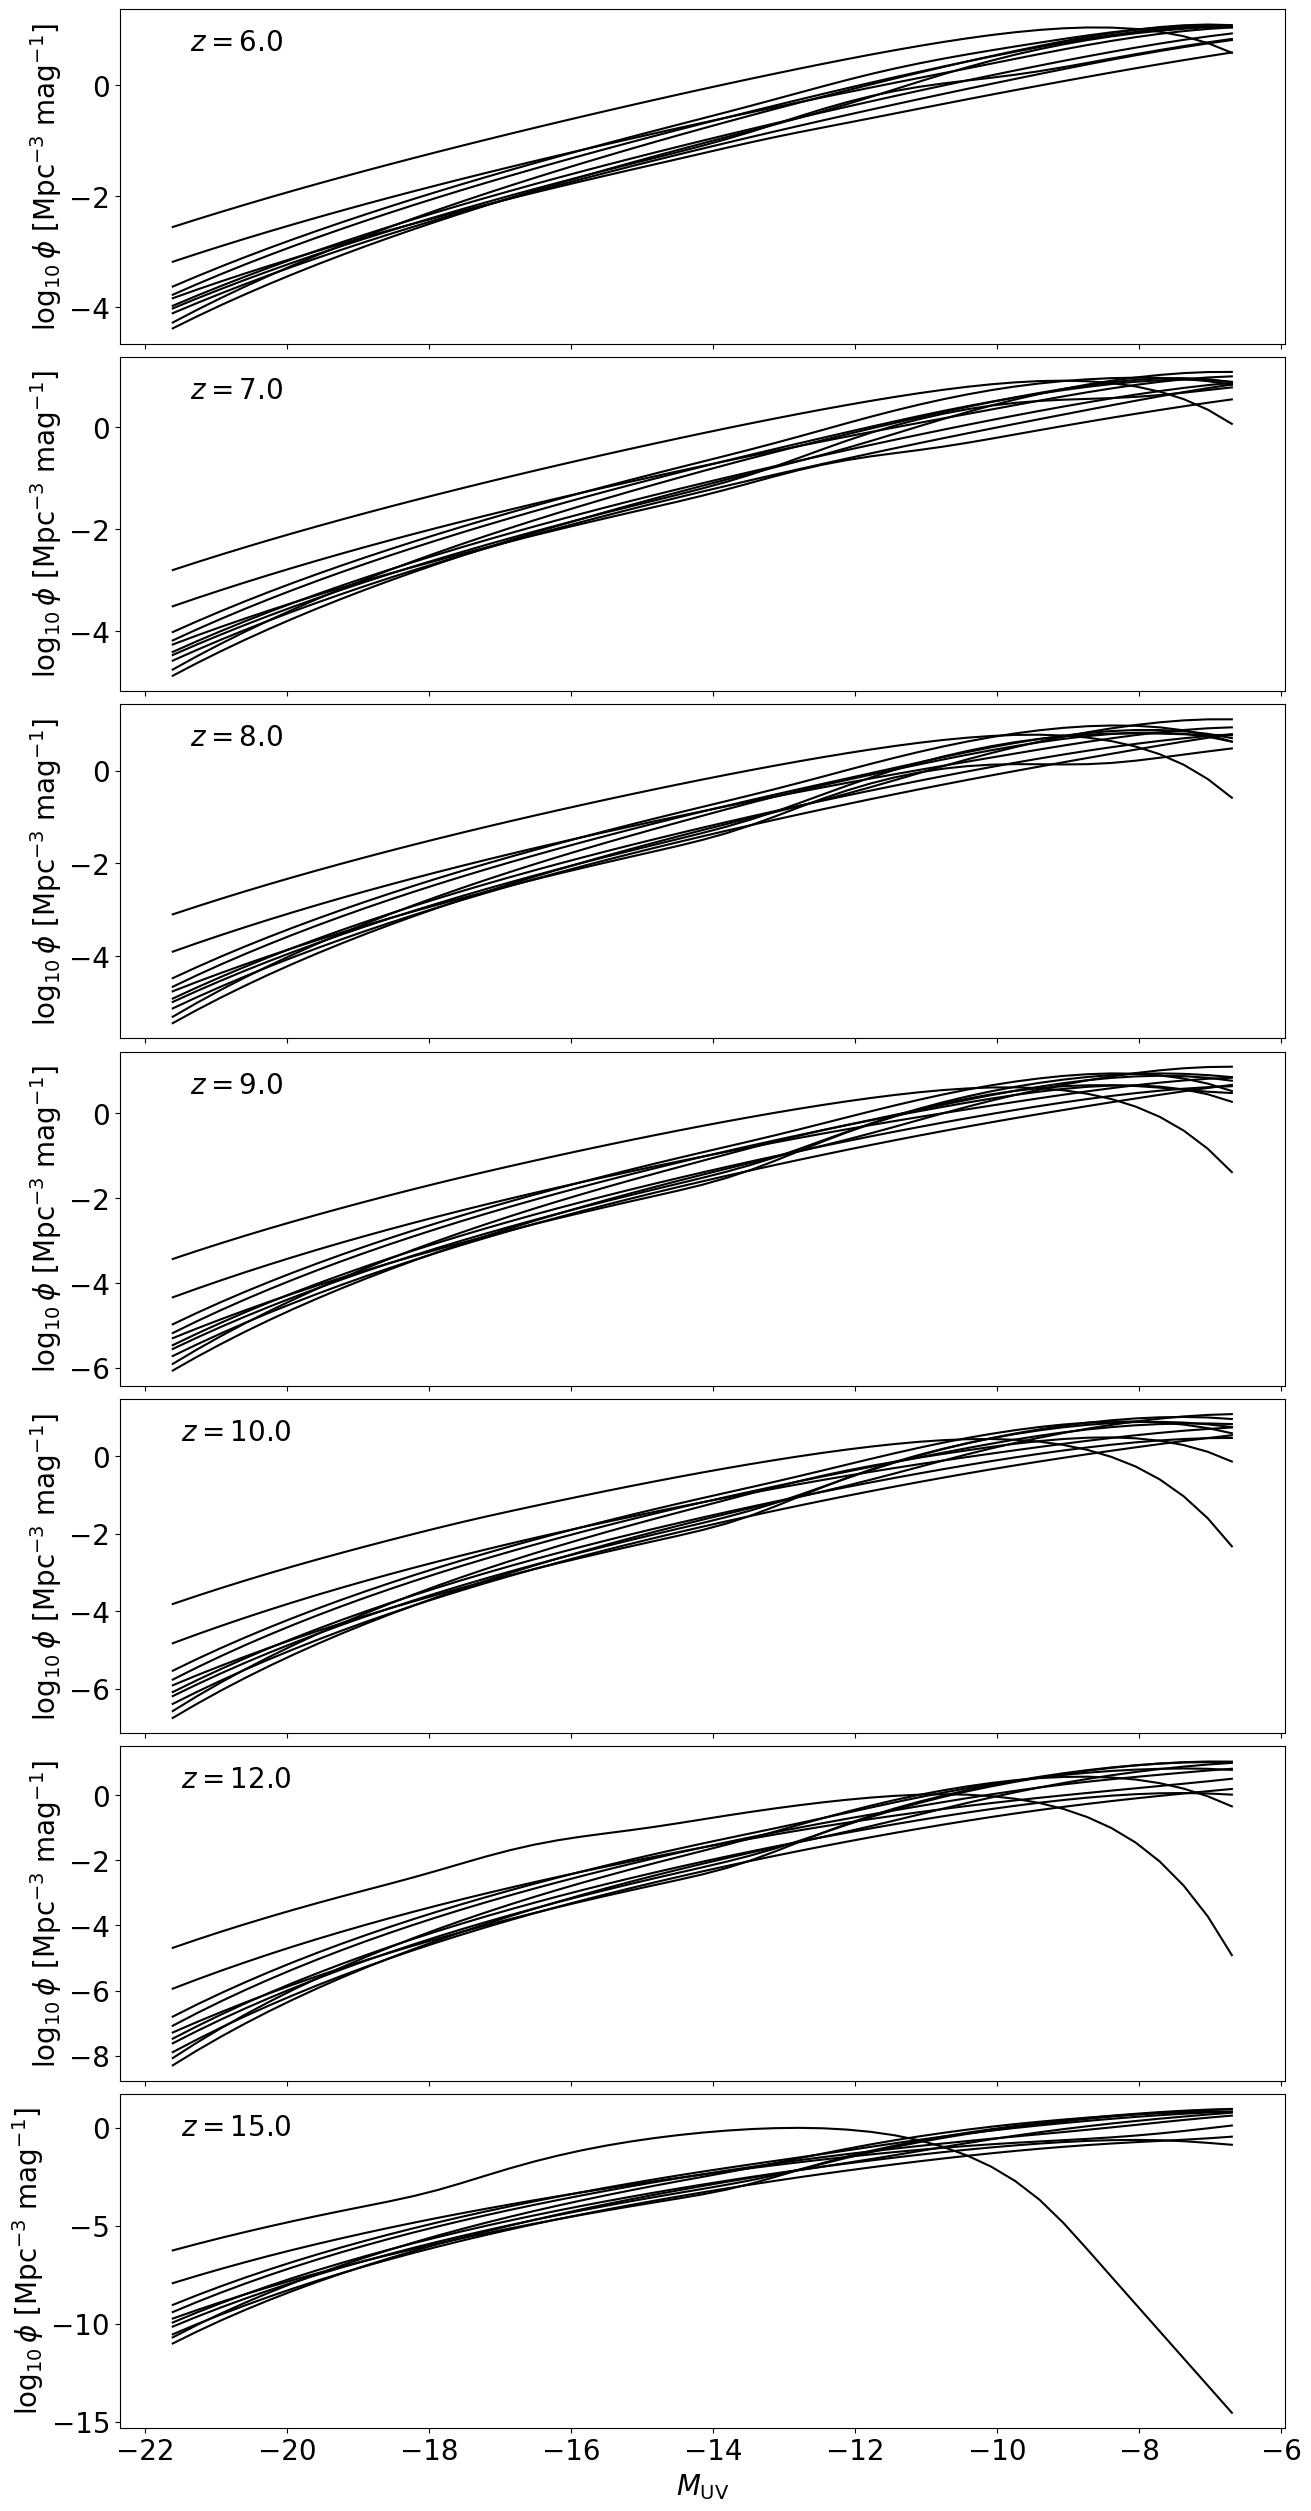

In [9]:
plot(M_UV=M_UV,lfs=UVLFs)
